<a href="https://colab.research.google.com/github/Lucas-Buk/Introducao-Ciencia-de-Dados/blob/master/Aula_1_Explora%C3%A7%C3%A3o_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gitly

In [23]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter(renderer='github')

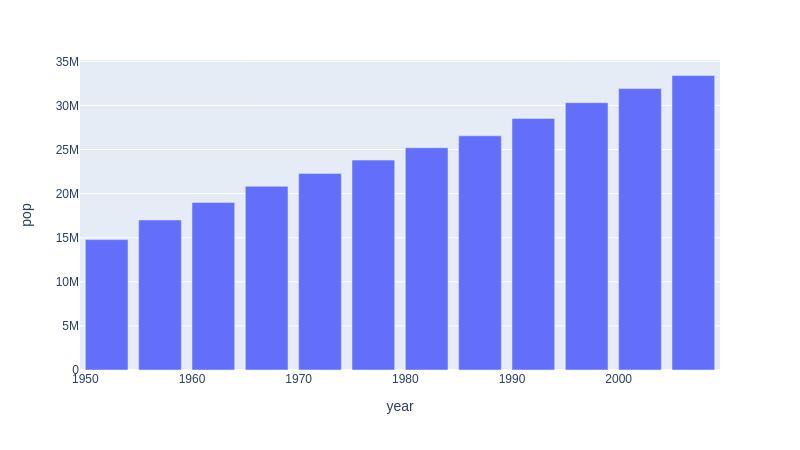

In [24]:
import plotly.express as px

data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
gitly.show(fig)

# Carregar os CSVs

In [25]:
import pandas as pd

In [26]:
df_clientes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/Ciência de Dados/Datasets/olist_sellers_dataset.csv')

# Exploração dataset Clientes

In [27]:
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [28]:
# Quais cidades tem no meu dataset
df_clientes.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [29]:
# Quantas cidades diferentes temos no dataset
len(df_clientes.customer_city.unique())

4119

In [30]:
# Total de clientes
len(df_clientes.customer_unique_id.unique())

96096

In [31]:
# Total de clientes por cidade
df_clientes.groupby(by = 'customer_city').count().sort_values(by = 'customer_id', ascending = False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
...,...,...,...,...
ibiara,1,1,1,1
rio espera,1,1,1,1
rio dos indios,1,1,1,1


In [32]:
df_clientes.customer_city.value_counts()

sao paulo                  15540
rio de janeiro              6882
belo horizonte              2773
brasilia                    2131
curitiba                    1521
                           ...  
lago verde                     1
caraibas                       1
sacra familia do tingua        1
santana do sobrado             1
bom jesus do sul               1
Name: customer_city, Length: 4119, dtype: int64

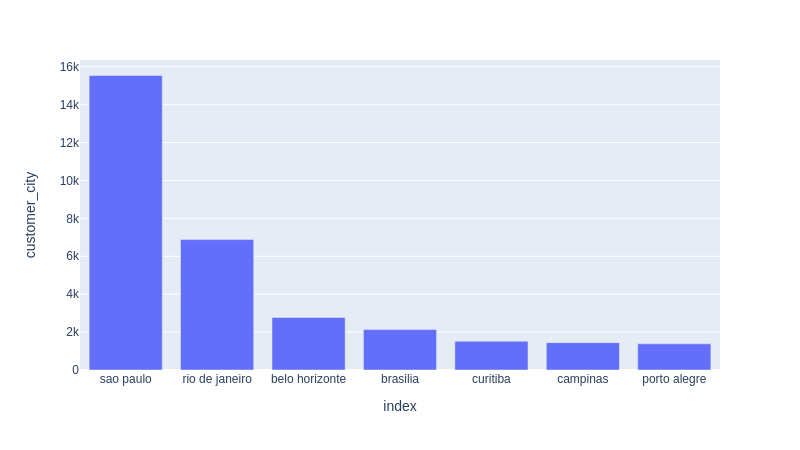

In [33]:
data = df_clientes.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city')
gitly.show(fig)

In [34]:
df_compra_itens.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [35]:
df_produtos.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
